In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
data = pd.read_csv("../Data/Biometric Data Analysis/train.csv")

In [35]:
data_dst = data.filter(regex='_dst$', axis=1).replace(0, np.NaN)
data_dst = data_dst.interpolate(methods='linear', axis=1)
data_dst.fillna(-999, inplace=True)

In [36]:
data.update(data_dst)

In [37]:
data.rho.unique()
data.drop("id", axis=1, inplace=True)

In [38]:
# group by rho

data_rho_25 = data[data['rho'] == 25]
data_rho_20 = data[data['rho'] == 20]
data_rho_15 = data[data['rho'] == 15]
data_rho_10 = data[data['rho'] == 10]

### XG Boost

In [39]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [40]:
def XY(df):
    X = df.iloc[:,:-4]
    y_hhb = df.iloc[:,-4]
    y_hhbo2 = df.iloc[:,-3]
    y_ca = df.iloc[:,-2]
    y_na = df.iloc[:,-1]
    
    return X, y_hhb, y_hhbo2, y_ca, y_na

### Parameter tunning(hhb)

In [41]:
from xgboost import XGBRegressor
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

In [42]:
X, y_hhb, y_hhbo2, y_ca, y_na = XY(data)
    
    # Split data
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y_hhb, test_size=0.2, shuffle=123)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y_hhbo2, test_size=0.2, shuffle=234)
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y_ca, test_size=0.2, shuffle=134)
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y_na, test_size=0.2, shuffle=124)

In [43]:
def XG_Boost(df, num):
    X, y_hhb, y_hhbo2, y_ca, y_na = XY(df)
    
    # Split data
    X1_train, X1_test, y1_train, y1_test = train_test_split(X, y_hhb, test_size=0.2, shuffle=1234)
    X2_train, X2_test, y2_train, y2_test = train_test_split(X, y_hhbo2, test_size=0.2, shuffle=1234)
    X3_train, X3_test, y3_train, y3_test = train_test_split(X, y_ca, test_size=0.2, shuffle=1234)
    X4_train, X4_test, y4_train, y4_test = train_test_split(X, y_na, test_size=0.2, shuffle=1234)
    
    
    xg_reg_hbb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=5, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
    xg_reg_hbo2 = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=5, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
    xg_reg_ca = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=5, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
    xg_reg_na = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=5, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
    
    
    xg_reg_hbb.fit(X1_train,y1_train)
    preds_hbb = xg_reg_hbb.predict(X1_test)

    xg_reg_hbo2.fit(X2_train,y2_train)
    preds_hbo2 = xg_reg_hbo2.predict(X2_test)

    xg_reg_ca.fit(X3_train,y3_train)
    preds_ca = xg_reg_ca.predict(X3_test)

    xg_reg_na.fit(X4_train,y4_train)
    preds_na = xg_reg_na.predict(X4_test)
    
    
    rmse_hbb = np.sqrt(mean_squared_error(y1_test, preds_hbb))
    rmse_hbo2 = np.sqrt(mean_squared_error(y2_test, preds_hbo2))
    rmse_ca = np.sqrt(mean_squared_error(y3_test, preds_ca))
    rmse_na = np.sqrt(mean_squared_error(y4_test, preds_na))

    print(num, " mm")
    print("RMSE - hbb  : %f" % (rmse_hbb))
    print("RMSE - hbo2 : %f" % (rmse_hbo2))
    print("RMSE - ca   : %f" % (rmse_ca))
    print("RMSE - na   : %f" % (rmse_na))
    
    
    return xg_reg_hbb, xg_reg_hbo2, xg_reg_ca, xg_reg_na

In [44]:
# data_rho_25, data_rho_20, data_rho_15, data_rho_10

hbb_25, hbo2_25, ca_25, na_25 = XG_Boost(data_rho_25, 25)
hbb_20, hbo2_20, ca_20, na_20 = XG_Boost(data_rho_20, 20)
hbb_15, hbo2_15, ca_15, na_15 = XG_Boost(data_rho_15, 15)
hbb_10, hbo2_10, ca_10, na_10 = XG_Boost(data_rho_10, 10)

25  mm
RMSE - hbb  : 1.113525
RMSE - hbo2 : 0.752592
RMSE - ca   : 2.675327
RMSE - na   : 1.897202
20  mm
RMSE - hbb  : 1.036104
RMSE - hbo2 : 0.730361
RMSE - ca   : 2.631914
RMSE - na   : 1.809545
15  mm
RMSE - hbb  : 1.140043
RMSE - hbo2 : 0.845191
RMSE - ca   : 2.493472
RMSE - na   : 1.532513
10  mm
RMSE - hbb  : 1.107396
RMSE - hbo2 : 0.812723
RMSE - ca   : 2.436522
RMSE - na   : 1.258147


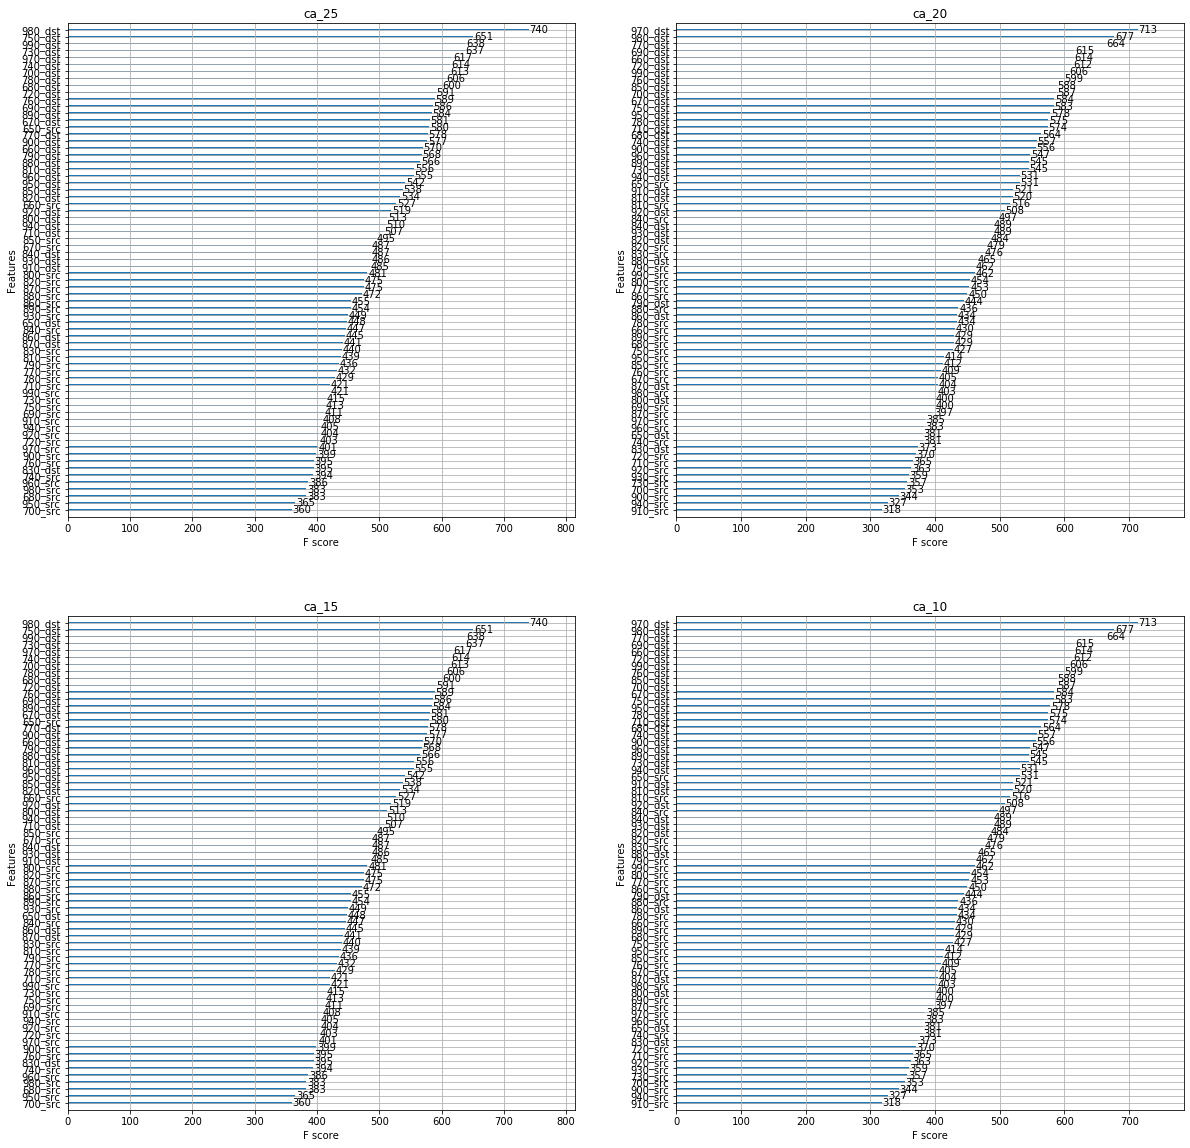

In [56]:
fig, ax = plt.subplots(2,2, figsize=(20,20))

xgb.plot_importance(ca_25, ax=ax[0,0], title='ca_25')
xgb.plot_importance(ca_20, ax=ax[0,1], title='ca_20')
xgb.plot_importance(ca_25, ax=ax[1,0], title='ca_15')
xgb.plot_importance(ca_20, ax=ax[1,1], title='ca_10')
plt.show()

In [57]:
importance = ca_25.get_booster().get_score(importance_type='weight')

importance_df = pd.DataFrame([importance]).T
importance_df.sort_values(by=0, ascending=False, inplace=True)

In [58]:
features = importance_df[importance_df[0] >= 500]
features.head()

,0
980_dst,740
750_dst,651
990_dst,638
730_dst,637
970_dst,617


In [59]:
xg_reg_ca = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=5, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [ ]:
xg_reg_ca.fit(X3_train,y3_train)
    preds_ca = xg_reg_ca.predict(X3_test)

In [16]:
test = pd.read_csv("../Data/Biometric Data Analysis/test.csv")

In [17]:
test_dst = test.filter(regex='_dst$', axis=1).replace(0, np.NaN)
test_dst = test_dst.interpolate(methods='linear', axis=1)
test_dst.fillna(0, inplace=True) 

test.update(test_dst)

In [18]:
test_rho_25 = test[test['rho'] == 25]
test_rho_20 = test[test['rho'] == 20]
test_rho_15 = test[test['rho'] == 15]
test_rho_10 = test[test['rho'] == 10]

In [19]:
def prediction(hbb, hbo2, ca, na, df):
    
    test = df.iloc[:, 1:]
    
    preds_hbb = hbb.predict(test)
    preds_hbo2 = hbo2.predict(test)
    preds_ca = ca.predict(test)
    preds_na = na.predict(test)
    
    df_1 = df.copy()
    
    df_1['hhb'] = preds_hbb
    df_1['hbo2'] = preds_hbo2
    df_1['ca'] = preds_ca
    df_1['na'] = preds_na
    
    return df_1

In [20]:
# test_rho_25 - hbb_25, hbo2_25, ca_25, na_25
# test_rho_20 - hbb_20, hbo2_20, ca_20, na_20
# test_rho_15 - hbb_15, hbo2_15, ca_15, na_15
# test_rho_10 - hbb_10, hbo2_10, ca_10, na_10

rho_25 = prediction(hbb_25, hbo2_25, ca_25, na_25, test_rho_25)
rho_20 = prediction(hbb_20, hbo2_20, ca_20, na_20, test_rho_20)
rho_15 = prediction(hbb_15, hbo2_15, ca_15, na_15, test_rho_15)
rho_10 = prediction(hbb_10, hbo2_10, ca_10, na_10, test_rho_10)

In [21]:
temp = pd.concat([rho_25, rho_20, rho_15, rho_10]).sort_values('id')
id = temp.id
temp = temp.iloc[:, -4:]

In [22]:
# 14(0.2), 15(0.3), 16(-999->0, 0,2)
submission = pd.concat([id, temp], axis=1)
submission.to_csv("submission/16.csv")

In [23]:
submission.head()

NameError: name 'submission' is not defined

10000